# Project Business Statistics: E-news Express


## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the dataset

In [ ]:
# complete the code below to load the dataset
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/abtest.csv'
df = pd.read_csv(path)
df

Mounted at /content/drive


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [ ]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [ ]:
# view the shape of the dataset
df.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [ ]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


#### Getting the statistical summary for the numerical variables

In [ ]:
df.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Getting the statistical summary for the categorical variables

In [ ]:
# write your code here to print the categorical summary statistics
import numpy as np

df.describe(include=np.object)

<ipython-input-11-f66d41ad2698>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


### Check for missing values

In [ ]:
# write your code here
df.isnull().sum()
#There are no missing values int the dataset,It is confirmed by isnull function

# some value missing bcoz of not being filled is also checked by using value_counts
df['language_preferred'].value_counts()
df['converted'].value_counts()
df['landing_page'].value_counts()
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

### Check for duplicates

In [ ]:
df.reset_index()

,index,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,0,546592,control,old,3.48,no,Spanish
1,2,546468,treatment,new,7.13,yes,English
2,3,546462,treatment,new,4.40,no,Spanish
3,4,546567,control,old,3.02,no,French
4,5,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...,...
95,96,546446,treatment,new,5.15,no,Spanish
96,97,546544,control,old,6.52,yes,English
97,98,546472,treatment,new,7.07,yes,Spanish
98,99,546481,treatment,new,6.20,yes,Spanish


In [ ]:
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
2,546468,treatment,new,7.13,yes,English
3,546462,treatment,new,4.40,no,Spanish
4,546567,control,old,3.02,no,French
5,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
96,546446,treatment,new,5.15,no,Spanish
97,546544,control,old,6.52,yes,English
98,546472,treatment,new,7.07,yes,Spanish
99,546481,treatment,new,6.20,yes,Spanish


### Univariate Analysis

#### Time spent on the page

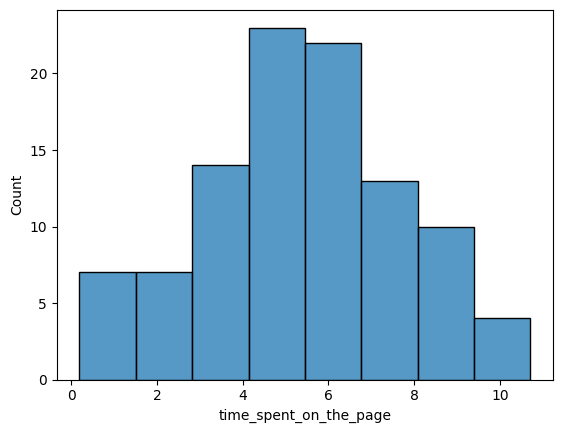

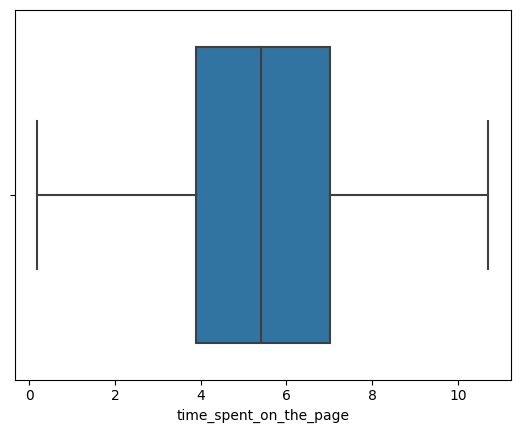

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

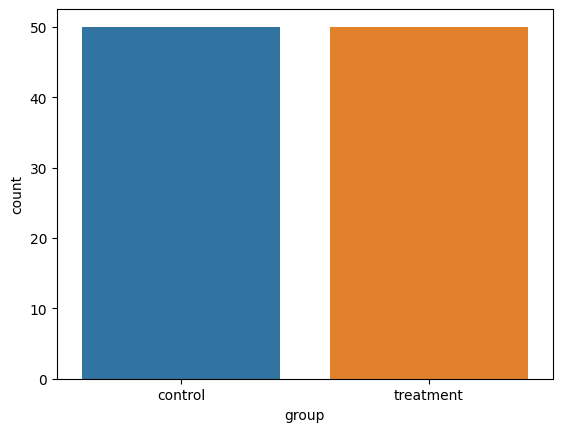

In [ ]:
sns.countplot(data=df,x='group')
plt.show()

#### Landing page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

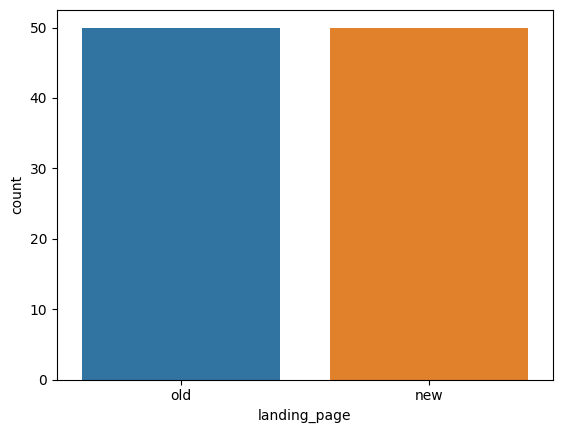

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.show()

#### Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [ ]:
df[(df['converted'] == 'yes') & (df['landing_page'] =='new')].shape[0]




new    33
old    21
Name: landing_page, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:

df[df['converted']=='yes']['group'].value_counts()['control']

21

In [ ]:
df[df['converted']=='yes']['group'].value_counts()['treatment']

33

In [ ]:
df[df['converted']=='yes']['language_preferred'].value_counts()

English    21
Spanish    18
French     15
Name: language_preferred, dtype: int64

In [ ]:
df[df['converted']=='no']['language_preferred'].value_counts()

French     19
Spanish    16
English    11
Name: language_preferred, dtype: int64

In [ ]:

from

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


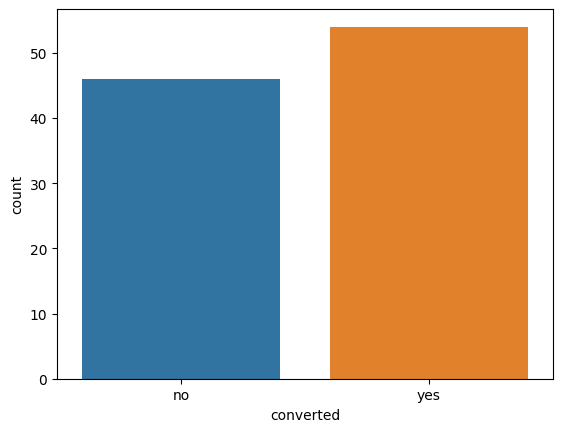

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='converted')
plt.show()

#### Language preferred

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

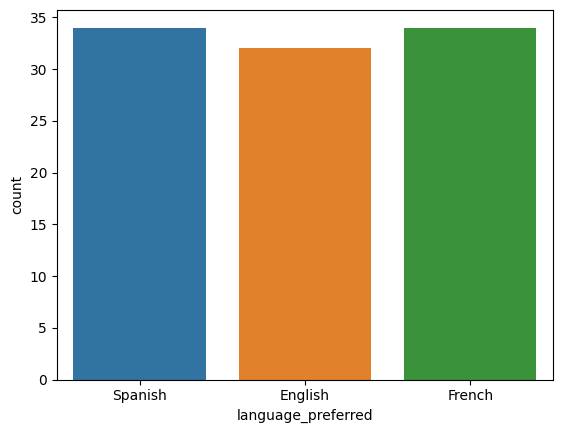

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

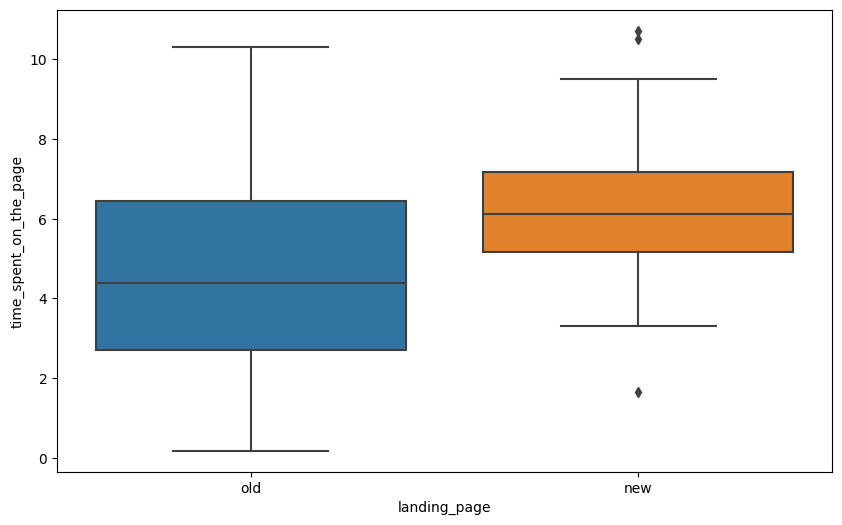

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Conversion status vs Time spent on the page

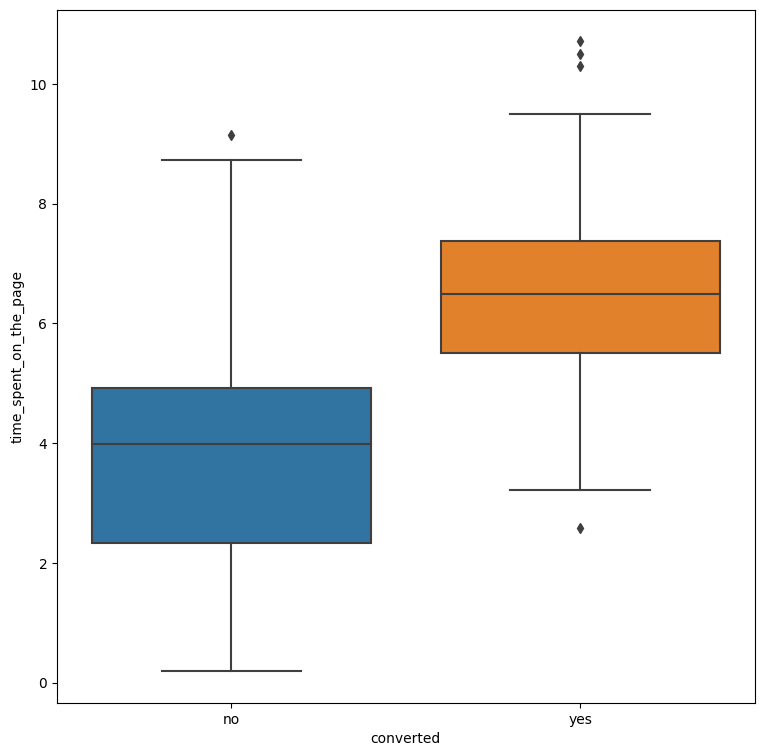

In [ ]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

#### Language preferred vs Time spent on the page[link text](https://)

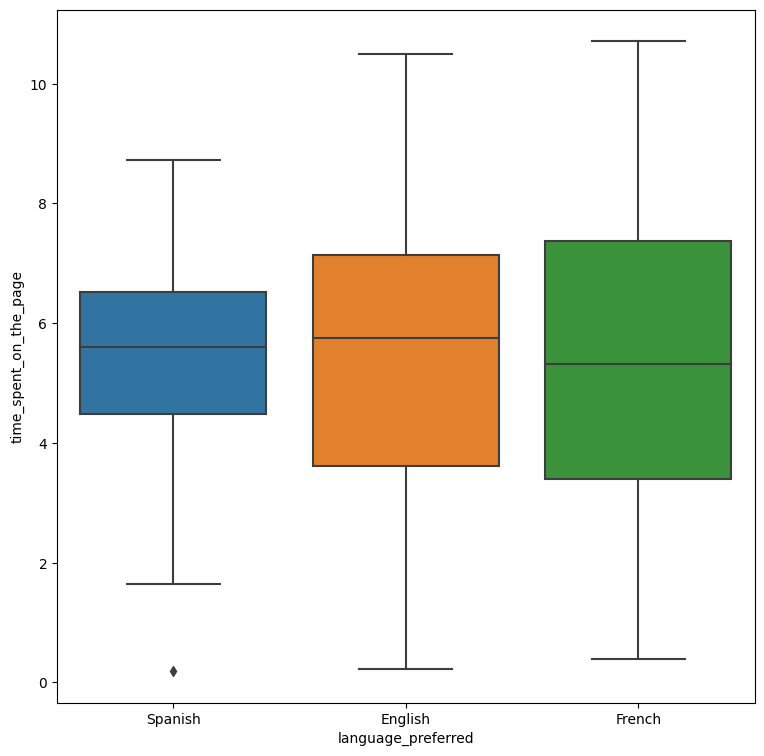

In [ ]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

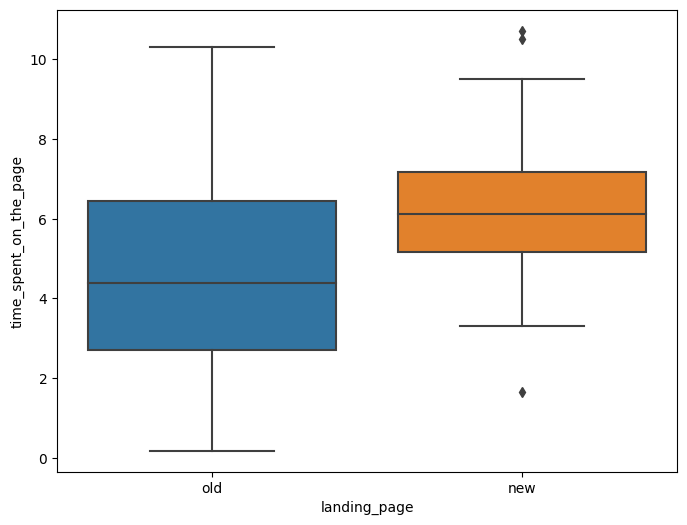

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()


#The visual analysis of time spent

In [ ]:
df.groupby('landing_page')['time_spent_on_the_page'].mean()

#By exploratory data analysis and visualization we see that avergae time spent on new page (6.22 seconds) is greater than
#avergae time spent on old page (4.53 seconds)

#Let us prove the same

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0$: Users does not spend more time on landing page than old page

$H_a$: Users spend more time on landing page than old page



**Step 2: Choosing Appropriate Test**

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

*Since both populations are independent,
Samples are simple random samples,
AS The size of both populations are greater than 30,
we assume it follows  normal distribution.
As  the standard deviation of populations are unknown we follow 2 independent sample T test


### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data:

In [ ]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

#It is bserved that population standard deviations cannot be assumed to be equal.

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var=False, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


In [ ]:
ttest_ind()

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

 *We observe that p value is less than alpha, Null hypothesis is rejected.
 *Hence we have enough statistical to say that Users spend more time on landing page than old page

In [ ]:
#Lets try to find the proportions:

#prop of user getting converted from new page

size = df[df['converted']=='yes'].shape[0]
prop_new = df[(df['converted']=='yes') & (df['landing_page']=='new')].shape[0]/size

prop_old =df[(df['converted']=='yes') & (df['landing_page']=='old')].shape[0]/size

print('prop_new_page_converted is %1.3F \nprop_old_page_converted is %1.3F' %(prop_new,prop_old))

prop_new_page_converted is 0.611 
prop_old_page_converted is 0.389


In [ ]:
df[df['converted']=='no'].shape[0]

46

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

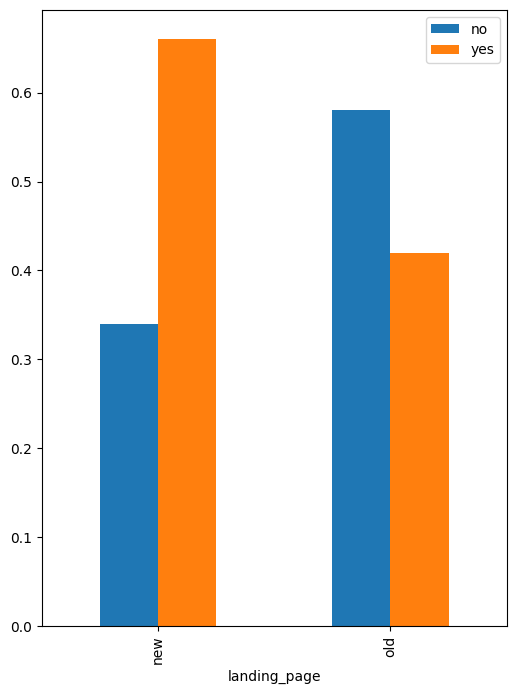

In [ ]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8))#,stacked=True)
plt.legend()
plt.show()

#Infrence:
#We infer that close to 66 percent of new page users are subscribed
#compared to 34 percent of old page user subscription


In [ ]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index')

converted,no,yes
landing_page,,
new,0.34,0.66
old,0.58,0.42


### Step 1: Define the null and alternate hypotheses

$H_0:$The conversion rate of new page is lesser than or equal to the conversion rate of old page

$H_a:$ The conversion rate of new page is greater than the conversion rate of old page



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

**2 proportions z test is chosen**


In [ ]:
#considering proportions of 2 independent population ,
#lets check if the binomail dsbn follows normal dsbn

n1 =  df['group'].value_counts()['treatment']
p1 =  df[df['group'] == 'treatment']['converted'].value_counts()['yes']/n1
n2 =  df['group'].value_counts()['control']
p2 =  df[df['group'] == 'control']['converted'].value_counts()['yes']/n2
n1p1 = n1*p1
n1_notp1 =n1*(1-p1)
n2p2 = n2*p2
n2_notp2 = n2*(1-p2)

print(n1,' ',p1,' ',n2,' ',p2)
print(n1p1,n1_notp1,n2p2,n2_notp2)

#Since all observations are greater than 10, binomail dsbn can be approximated to follow normal dsbn

50   0.66   50   0.42
33.0 17.0 21.0 29.000000000000004


### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively, new_converted {2},old_converted {3}'.format(n_control, n_treatment ,new_converted,old_converted))

The numbers of users served the new and old pages are 50 and 50 respectively, new_converted 33,old_converted 21


### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')
#complete the code by filling appropriate parameters in the blanks
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As p_value is less than alpha, null hypothesis is rejected.

We have enough statistical evidence to say the **conversion rate of new page is greater than conversion rate of old page.**



## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

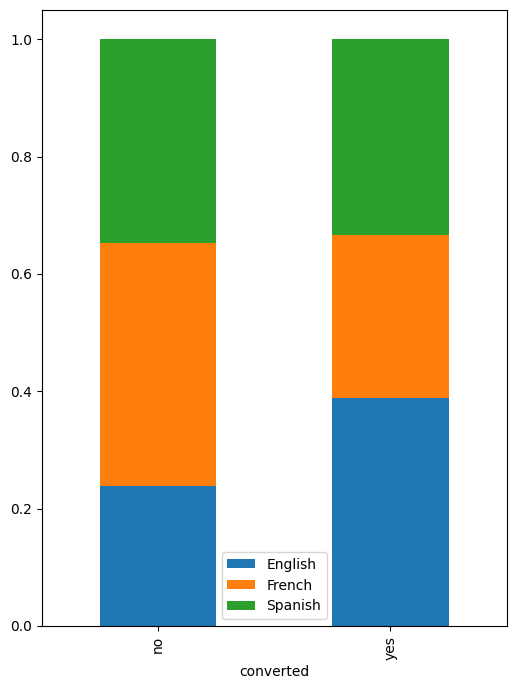

In [ ]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()




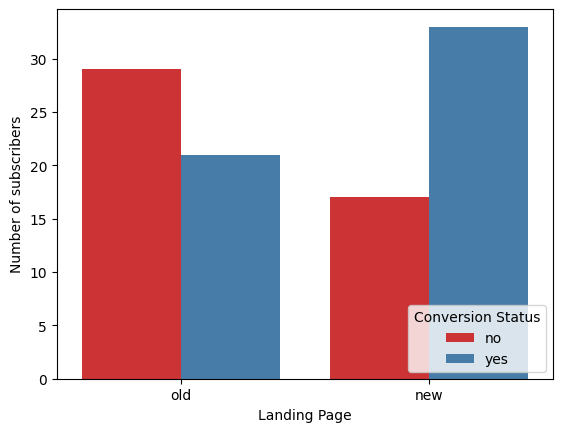

In [ ]:
pl =sns.countplot(data = df, x = 'landing_page', hue = 'converted', palette = 'Set1')
pl.set_xlabel('Landing Page')
pl.set_ylabel('Number of subscribers')
pl.legend(title = 'Conversion Status', loc = 'lower right')

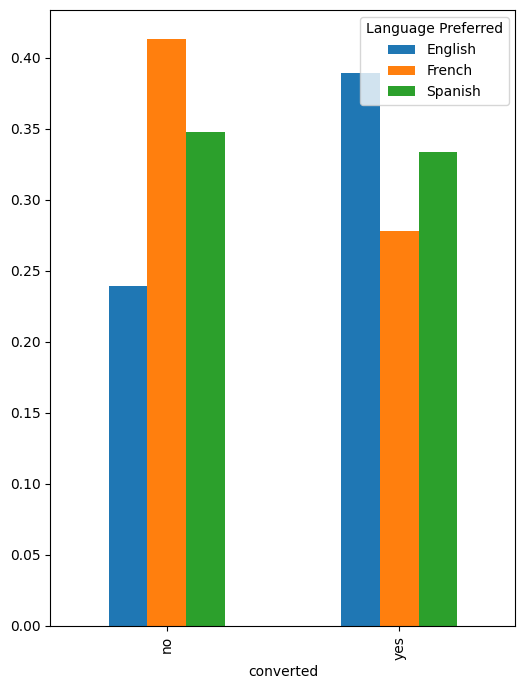

In [ ]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8))
plt.legend(title='Language Preferred')
plt.show()




In [ ]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index')

language_preferred,English,French,Spanish
converted,,,
no,0.239130,0.413043,0.347826
yes,0.388889,0.277778,0.333333


In [ ]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['converted'],df['language_preferred'])
stat,p_val,df,ef=chi2_contingency(crosstab)
if p_val<0.05:
  print(' null is rejected -  user subscription is dependent of preferred language')
else:
  print('null not rejecetd  - user subscription being independent of preferred language')

null not rejecetd  - user subscription being independent of preferred language


### Step 1: Define the null and alternate hypotheses

$H_0:$ convereted status is independent on the preferred language

$H_a:$ convereted status is dependent on the preferred language



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**


**We are comparing 2 categorical variables - converted and preferred_language.
**Sample observation in each level of the variable is atleast 5.
**Based on this assumption the test static we choose is chi-square-test static.
**Test static follows chi-square distribution.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import chi2_contingency

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.

WE  have enough statistical evidence to say the converted status is independent on language preferred



## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

In [ ]:
df_new

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


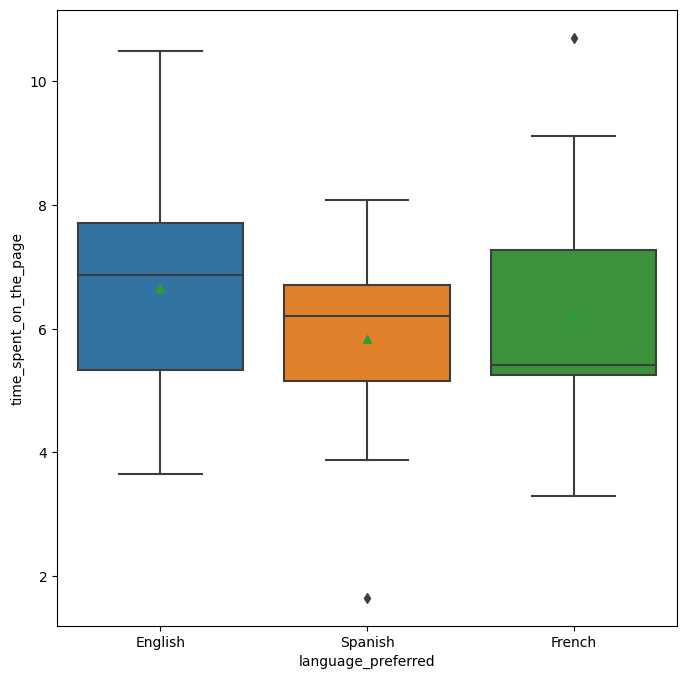

In [ ]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x ='language_preferred', y ='time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

#Infrence:
#The mean spent times for the users of the new page preferrning different languages seem to be slightly different.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df_new

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


In [ ]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()



language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0:$ Mean time spent on the new page same for the different language users

$H_a:$ Mean time of atleast one language is different for different language users

---



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.**
 To compare mean time spent on different user languages is same, we** use ANOVA test.**

As we are comparing 3 means,
lets check if data follows normal distribution using shapiro's test
variance are all equal by checking using levenes test.


In [ ]:
#Normal distribution check
# null hypothesis - data follows normal distribution
#alternate hypothesis - data does not follow normal distribution

from scipy.stats import shapiro
test_static,p_value = shapiro(df['time_spent_on_the_page'])
test_static,p_value

if p_value<0.05:
  print('null hypothesis is rejected - data does not follow normal dsbn')
else:
  print('null hypothesis is not rejected - data does follow normal dsbn')

null hypothesis is not rejected - data does follow normal dsbn


In [ ]:
#To check if variances are equal we follow levenes test.
from scipy.stats import levene

# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']   # complete your code here

test_stat,p_value = levene(time_spent_English,time_spent_Spanish,time_spent_French)
test_stat,p_value

if p_value<0.05:
  print('null hypothesis is rejected -  atleast one variance is different from another')
else:
  print('null hypothesis is not rejected - all variance are equal')

(0.7736446756800186, 0.46711357711340173)

**To compare mean time spent on different user languages is same, we use ANOVA test.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']   # complete your code here

In [ ]:
time_spent_French

6      5.25
8     10.71
13     6.03
28     7.81
46     5.37
57     8.30
60     6.01
61     6.79
65     7.27
71     5.42
78     9.12
80     4.68
81     5.26
87     3.68
88     3.30
90     5.40
93     4.94
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is',test_stat, p_value)

The p-value is 0.8543992770006822 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is greater than the level of significance, we fail to reject the null hypothesis.
we have enough statistical evidence to say
Mean time spent on the new page is not different
 for the different language users



## Conclusion and Business Recommendations


Conclusion:


*The mean reading time of users is 5.2 minutes and maximum time is 10 minutes
which seems to be vwry low.
*The preferred language options (English, French, and Spanish)percentage are close. Thus,we need to keep news in all three languages for the users.
*The mean reading time of new page is greater than old page, new page seems efficient.This implicates new page gathers lot of attention.
*The conversion rate for new page users is higher than the old page users,
 this implicates new page have attracted more users than the old page.
*Conversion state of users does not depend on language.
Thus Language preference does not influence the subscription of users.
*The mean reading time of new page of different languages are almost the same.
 This indiactes that language preference does not signal significant effect on attracting users.


Reccomendations:

*The mean reading time of new page is greater than old page, new page seems efficient.Thus its recommended to take up the new landing page.
*The conversion rate for new page users is higher than the old page users.
It is recommended to take up the new landing page to increase subscription.
*Conversion state of users does not depend on language.
Thus Language preference does not influence the subscription of users.
Still all 3 languages are popular among users ,so its best to keep news in all 3 languages.
*The mean reading time of new page of different languages are almost the same.
 This indiactes that language preference does not signal significant effect on attracting users.
 Again its still recommended that all 3 languages are popular among users ,so its best to keep news in all 3 languages.


___